<a href="https://colab.research.google.com/github/MykolaDehtiarov/Account_metric/blob/main/Python_for_DA_Module_Task.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

In [ ]:
from google.colab import drive
drive.mount("/content/drive")

Mounted at /content/drive


In [ ]:
%cd /content/drive/MyDrive/Mate_Homework

/content/drive/MyDrive/Mate_Homework


In [ ]:
file_path_events = 'events.csv'
events_df = pd.read_csv(file_path_events)

In [ ]:
file_path_products = 'products.csv'
products_df = pd.read_csv(file_path_products)

In [ ]:
file_path_countries = 'countries.csv'
Countries_df = pd.read_csv(file_path_countries)

In [ ]:
print("Перші 5 рядків таблиці events.csv:")
print(events_df.head())

Перші 5 рядків таблиці events.csv:
    Order ID Order Date   Ship Date Order Priority Country Code  Product ID  \
0  100640618  10/8/2014  10/18/2014              M          NOR        2103   
1  100983083  8/11/2016   8/11/2016              C          SRB        2103   
2  101025998  7/18/2014   8/11/2014              M          NaN        7940   
3  102230632  5/13/2017   6/13/2017              L          MNE        2455   
4  103435266  8/11/2012   9/18/2012              H          SRB        1270   

  Sales Channel  Units Sold  Unit Price  Unit Cost  
0        Online       650.0      205.70     117.11  
1       Offline      1993.0      205.70     117.11  
2        Online      4693.0      668.27     502.54  
3        Online      1171.0      109.28      35.84  
4       Offline      7648.0       47.45      31.79  


In [ ]:
print("Перші 5 рядків таблиці products.csv:")
print(products_df.head())

Перші 5 рядків таблиці products.csv:
     id        item_type
0  2103           Cereal
1  7940        Household
2  2455          Clothes
3  1270        Beverages
4  8681  Office Supplies


In [ ]:
print("Перші 5 рядків таблиці countries.csv:")
print(Countries_df.head())

Перші 5 рядків таблиці countries.csv:
             name alpha-2 alpha-3   region       sub-region
0     Afghanistan      AF     AFG     Asia    Southern Asia
1   Åland Islands      AX     ALA   Europe  Northern Europe
2         Albania      AL     ALB   Europe  Southern Europe
3         Algeria      DZ     DZA   Africa  Northern Africa
4  American Samoa      AS     ASM  Oceania        Polynesia


##В Датасеті events  ми бачим детальну інформацію що пов'язана з ціною товару відправленнями каналами збуту країнами кодами країн та ідентифікаторами продукту в датасеті products  нам представлені категорії товару та ідентифікатори таким чином ці два датасети можна об'єднати за ідентифікаторами в свою чергу countries  повністю побудована на логістичних зв'язках країни,регіони та суб-регіони а також коди країн завд'яки яким цю таблицю вже можна об'єднати з events  яка в свою чергу обєднюється з products  по  ID

In [ ]:
print("Пропущені значення в events.csv:")
print(events_df.isnull().sum())
print("-" * 30)

Пропущені значення в events.csv:
Order ID           0
Order Date         0
Ship Date          0
Order Priority     0
Country Code      82
Product ID         0
Sales Channel      0
Units Sold         2
Unit Price         0
Unit Cost          0
dtype: int64
------------------------------


In [ ]:
print("Пропущені значення в products.csv:")
print(products_df.isnull().sum())
print("-" * 30)

Пропущені значення в products.csv:
id           0
item_type    0
dtype: int64
------------------------------


In [ ]:
print("Пропущені значення в countries.csv:")
print(Countries_df.isnull().sum())
print("-" * 30)

Пропущені значення в countries.csv:
name          0
alpha-2       1
alpha-3       0
region        1
sub-region    1
dtype: int64
------------------------------


##Моя особиста думка це те що дані були втрачені або не були записанні по іншому я просто не можу пояснити таку велику відсутність в колонці country_code
##Стосовно інших пропущених знаень в 1-2 рядка кількість в край мала і краще бути видалити ці рядки щоб уникнути помилок при об'єднанні трьох таблиць

In [ ]:
events_df.dropna(subset=['Units Sold'], inplace=True)

In [ ]:
 events_df['Country Code'].fillna('Unknown', inplace=True)

/tmp/ipython-input-3335468040.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  events_df['Country Code'].fillna('Unknown', inplace=True)


In [ ]:
Countries_df.dropna(subset=['region', 'sub-region', 'alpha-2'], inplace=True)

In [ ]:
print("Пропущені значення в events.csv після очищення:")
print(events_df.isnull().sum())
print("-" * 30)
print("Пропущені значення в countries.csv після очищення:")
print(Countries_df.isnull().sum())

Пропущені значення в events.csv після очищення:
Order ID          0
Order Date        0
Ship Date         0
Order Priority    0
Country Code      0
Product ID        0
Sales Channel     0
Units Sold        0
Unit Price        0
Unit Cost         0
dtype: int64
------------------------------
Пропущені значення в countries.csv після очищення:
name          0
alpha-2       0
alpha-3       0
region        0
sub-region    0
dtype: int64


##Як я зазначав вище одни з головних ключів для об'єднання 3 таблиць є код країни тому видалити стовпчик з ним я не можу так як це те саме що видалити ID інші ж дані не несуть такої вважливості для подальшої роботи а не коректне виправлення може призвести до помилок та аномалій



In [ ]:
print("Типи даних в events_df до перетворення:")
print(events_df.info())

Типи даних в events_df до перетворення:
<class 'pandas.core.frame.DataFrame'>
Index: 1328 entries, 0 to 1329
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Order ID        1328 non-null   int64  
 1   Order Date      1328 non-null   object 
 2   Ship Date       1328 non-null   object 
 3   Order Priority  1328 non-null   object 
 4   Country Code    1328 non-null   object 
 5   Product ID      1328 non-null   int64  
 6   Sales Channel   1328 non-null   object 
 7   Units Sold      1328 non-null   float64
 8   Unit Price      1328 non-null   float64
 9   Unit Cost       1328 non-null   float64
dtypes: float64(3), int64(2), object(5)
memory usage: 114.1+ KB
None


In [ ]:
events_df['Order Date'] = pd.to_datetime(events_df['Order Date'], errors='coerce')
events_df['Ship Date'] = pd.to_datetime(events_df['Ship Date'], errors='coerce')

In [ ]:
print("\nТипи даних events_df після перетворення дат:")
print(events_df.info())


Типи даних events_df після перетворення дат:
<class 'pandas.core.frame.DataFrame'>
Index: 1328 entries, 0 to 1329
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   Order ID        1328 non-null   int64         
 1   Order Date      1328 non-null   datetime64[ns]
 2   Ship Date       1328 non-null   datetime64[ns]
 3   Order Priority  1328 non-null   object        
 4   Country Code    1328 non-null   object        
 5   Product ID      1328 non-null   int64         
 6   Sales Channel   1328 non-null   object        
 7   Units Sold      1328 non-null   float64       
 8   Unit Price      1328 non-null   float64       
 9   Unit Cost       1328 non-null   float64       
dtypes: datetime64[ns](2), float64(3), int64(2), object(3)
memory usage: 114.1+ KB
None


## ПРоблема була з рядками  Order_Date та Ship_date вони не були датами після перетворення  datetime коректний формат вьому решта все добре

In [ ]:
print("\nКількість повних дублікатів в events_df:", events_df.duplicated().sum())


Кількість повних дублікатів в events_df: 0


In [ ]:
print("\nОписова статистика для числових колонок events_df:")
print(events_df[['Units Sold', 'Unit Price', 'Unit Cost']].describe())


Описова статистика для числових колонок events_df:
        Units Sold   Unit Price    Unit Cost
count  1328.000000  1328.000000  1328.000000
mean   4952.201807   264.913245   187.211521
std    2905.198996   217.386320   176.187801
min       2.000000     9.330000     6.920000
25%    2356.750000    81.730000    35.840000
50%    4962.000000   154.060000    97.440000
75%    7459.500000   437.200000   263.330000
max    9999.000000   668.270000   524.960000


In [ ]:
anomalies_df = events_df[
    (events_df['Units Sold'] <= 0) |
    (events_df['Unit Price'] <= 0) |
    (events_df['Unit Cost'] < 0)
]

if not anomalies_df.empty:
    print("\nВиявлені аномалії (негативні або нульові значення):")
    print(anomalies_df)
    # Якщо потрібно, можна видалити ці рядки:
    # events_df.drop(anomalies_df.index, inplace=True)
else:
    print("\nАномалій не виявлено.")


Аномалій не виявлено.


##В ході виконання коду дублікатів чи аномалій не було виявлено а єдину не коректність усунуто

In [ ]:
print("Кількість дублікатів після нормалізації:", Countries_df.duplicated().sum())


Кількість дублікатів після нормалізації: 0


In [ ]:
print("Типи даних в Countries_df до перетворення:")
print(Countries_df.info())

Типи даних в Countries_df до перетворення:
<class 'pandas.core.frame.DataFrame'>
Index: 247 entries, 0 to 248
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   name        247 non-null    object
 1   alpha-2     247 non-null    object
 2   alpha-3     247 non-null    object
 3   region      247 non-null    object
 4   sub-region  247 non-null    object
dtypes: object(5)
memory usage: 11.6+ KB
None


In [ ]:
print("Типи даних в products_df до перетворення:")
print(products_df.info())

Типи даних в products_df до перетворення:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12 entries, 0 to 11
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   id         12 non-null     int64 
 1   item_type  12 non-null     object
dtypes: int64(1), object(1)
memory usage: 324.0+ bytes
None


## Після видалення дублікатів ніяких аномалій не кореткних типів даних чи багів не виявлено

In [ ]:
events_df['Country Code'] = events_df['Country Code'].str.lower().str.strip()
Countries_df['alpha-2'] = Countries_df['alpha-2'].str.lower().str.strip()

In [ ]:
events_countries = set(events_df['Country Code'].unique())
countries_codes = set(Countries_df['alpha-2'].unique())

In [ ]:
missing_codes = events_countries - countries_codes
print("Коди, які є в events_df, але відсутні в countries_df:", missing_codes)

Коди, які є в events_df, але відсутні в countries_df: {'dnk', 'est', 'lva', 'ita', 'pol', 'and', 'lux', 'deu', 'geo', 'cze', 'hun', 'ukr', 'nld', 'lie', 'nor', 'prt', 'fra', 'che', 'bgr', 'srb', 'ltu', 'aut', 'isl', 'alb', 'svn', 'bel', 'mlt', 'mco', 'hrv', 'rou', 'bih', 'grc', 'blr', 'gbr', 'cyp', 'irl', 'fin', 'rus', 'swe', 'svk', 'arm', 'smr', 'unknown', 'esp', 'mne', 'mkd'}


In [ ]:
valid_codes = Countries_df['alpha-2'].unique()

In [ ]:
events_df_filtered = events_df[events_df['Country Code'].isin(valid_codes)]

In [ ]:
print(f"Кількість рядків в events_df до фільтрації: {len(events_df)}")
print(f"Кількість рядків в events_df після фільтрації: {len(events_df_filtered)}")

Кількість рядків в events_df до фільтрації: 1328
Кількість рядків в events_df після фільтрації: 0


In [ ]:
merged_events_products = pd.merge(events_df, products_df, left_on='Product ID', right_on='id', how='left')
final_merged_df = pd.merge(merged_events_products, Countries_df, left_on='Country Code', right_on='alpha-2', how='left')
print("Перші 5 рядків об'єднаного датафрейму з NaN:")
print(final_merged_df.head())
print("-" * 50)
print("Кількість пропущених значень після об'єднання (left join):")
print(final_merged_df.isnull().sum())

Перші 5 рядків об'єднаного датафрейму з NaN:
    Order ID Order Date  Ship Date Order Priority Country Code  Product ID  \
0  100640618 2014-10-08 2014-10-18              M          nor        2103   
1  100983083 2016-08-11 2016-08-11              C          srb        2103   
2  101025998 2014-07-18 2014-08-11              M      unknown        7940   
3  102230632 2017-05-13 2017-06-13              L          mne        2455   
4  103435266 2012-08-11 2012-09-18              H          srb        1270   

  Sales Channel  Units Sold  Unit Price  Unit Cost    id  item_type name  \
0        Online       650.0      205.70     117.11  2103     Cereal  NaN   
1       Offline      1993.0      205.70     117.11  2103     Cereal  NaN   
2        Online      4693.0      668.27     502.54  7940  Household  NaN   
3        Online      1171.0      109.28      35.84  2455    Clothes  NaN   
4       Offline      7648.0       47.45      31.79  1270  Beverages  NaN   

  alpha-2 alpha-3 region sub-

In [ ]:
final_merged_df['item_type'].fillna('unknown', inplace=True)
final_merged_df['name'].fillna('unknown', inplace=True)
final_merged_df['region'].fillna('unknown', inplace=True)
final_merged_df['sub-region'].fillna('unknown', inplace=True)
final_merged_df['alpha-2'].fillna('unknown', inplace=True)
final_merged_df['alpha-3'].fillna('unknown', inplace=True)

/tmp/ipython-input-1055110106.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  final_merged_df['item_type'].fillna('unknown', inplace=True)
/tmp/ipython-input-1055110106.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=Tr

In [ ]:
print("Перші 5 рядків об'єднаного датафрейму:")
print(final_merged_df.head())

Перші 5 рядків об'єднаного датафрейму:
    Order ID Order Date  Ship Date Order Priority Country Code  Product ID  \
0  100640618 2014-10-08 2014-10-18              M          nor        2103   
1  100983083 2016-08-11 2016-08-11              C          srb        2103   
2  101025998 2014-07-18 2014-08-11              M      unknown        7940   
3  102230632 2017-05-13 2017-06-13              L          mne        2455   
4  103435266 2012-08-11 2012-09-18              H          srb        1270   

  Sales Channel  Units Sold  Unit Price  Unit Cost    id  item_type     name  \
0        Online       650.0      205.70     117.11  2103     Cereal  unknown   
1       Offline      1993.0      205.70     117.11  2103     Cereal  unknown   
2        Online      4693.0      668.27     502.54  7940  Household  unknown   
3        Online      1171.0      109.28      35.84  2455    Clothes  unknown   
4       Offline      7648.0       47.45      31.79  1270  Beverages  unknown   

   alpha-2 

## Через те що багато кодів країн з таблички івентів не збігались з табличкою Країн вибивало постійно помилку при  left  join  використовуючи Inner  для збереження всіх даних таблиця крашилась і видалялла всі рядки і всі значення переносячи лишень заголовки [текст посилання](https://ibb.co/WNzdz1cd)


In [ ]:
final_merged_df['Total Profit'] = (final_merged_df['Unit Price'] - final_merged_df['Unit Cost']) * final_merged_df['Units Sold']

In [ ]:
total_profit = final_merged_df['Total Profit'].sum()
total_orders = final_merged_df['Order ID'].nunique()
total_countries = final_merged_df['item_type'].nunique()
total_regions = final_merged_df['Country Code'].nunique()
total_units_sold = final_merged_df['Units Sold'].sum()

In [ ]:
print(f"Загальний прибуток: ${total_profit:,.2f}")
print(f"Загальна кількість замовлень: {total_orders}")
print(f"Кількість охоплених країн: {total_countries}")
print(f"Загальна кількість проданих одиниць: {total_units_sold:,.0f}")

Загальний прибуток: $501,434,459.00
Загальна кількість замовлень: 1328
Кількість охоплених країн: 12
Загальна кількість проданих одиниць: 6,576,524


##Загальний прибуток: $501,434,459.00
##Загальна кількість замовлень: 1328
##Кількість охоплених країн: 12
##Загальна кількість проданих одиниць: 6,576,524

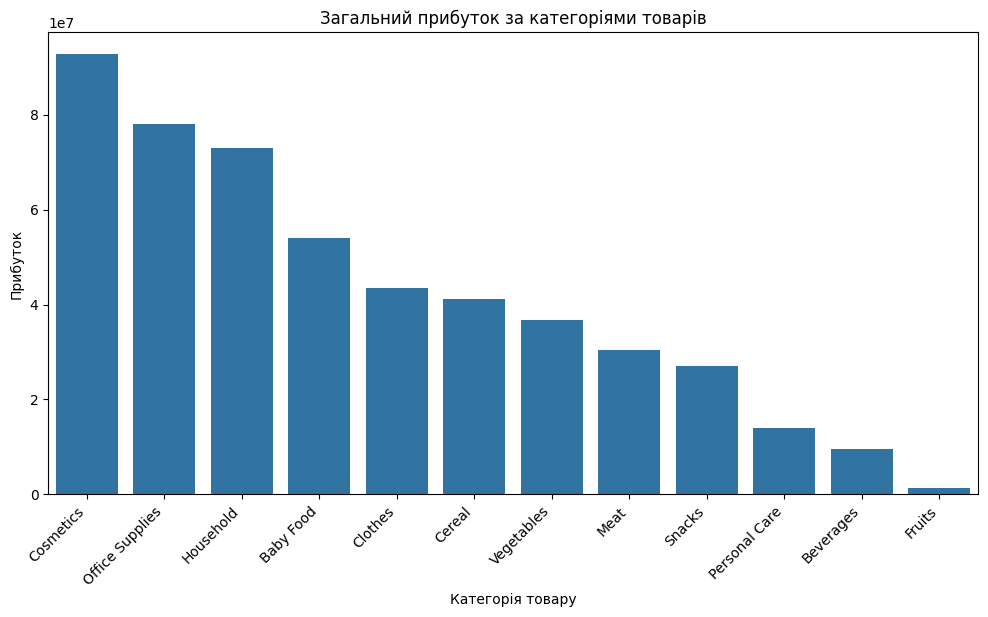

In [ ]:
category_analysis = final_merged_df.groupby('item_type')['Total Profit'].sum().sort_values(ascending=False)
plt.figure(figsize=(12, 6))
sns.barplot(x=category_analysis.index, y=category_analysis.values)
plt.title('Загальний прибуток за категоріями товарів')
plt.ylabel('Прибуток')
plt.xlabel('Категорія товару')
plt.xticks(rotation=45, ha='right')
plt.show()

##За категоріями товару помітна домінація в категоріях Косметік та Офісні приладдя в категорія Фрутс користується найнищим попитом


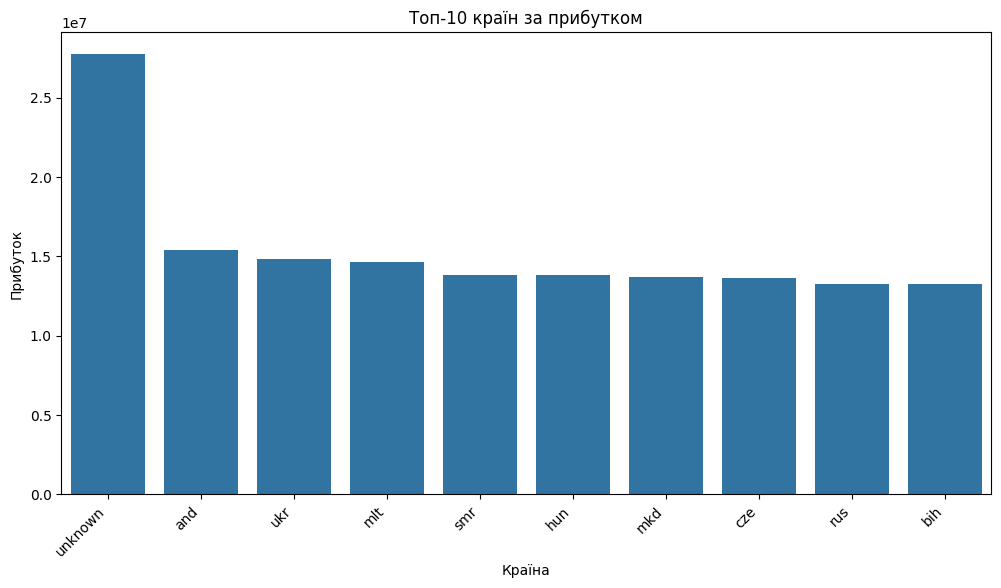

In [ ]:
filtered_df = final_merged_df[final_merged_df['Country Code'] != 'Unknown']


country_analysis = filtered_df.groupby('Country Code')['Total Profit'].sum().sort_values(ascending=False).head(10)

plt.figure(figsize=(12, 6))
sns.barplot(x=country_analysis.index, y=country_analysis.values)
plt.title('Топ-10 країн за прибутком')
plt.ylabel('Прибуток')
plt.xlabel('Країна')
plt.xticks(rotation=45, ha='right')
plt.show()

##Найбільший попит зафіксовано в Андорі та Україні найменший в Греції

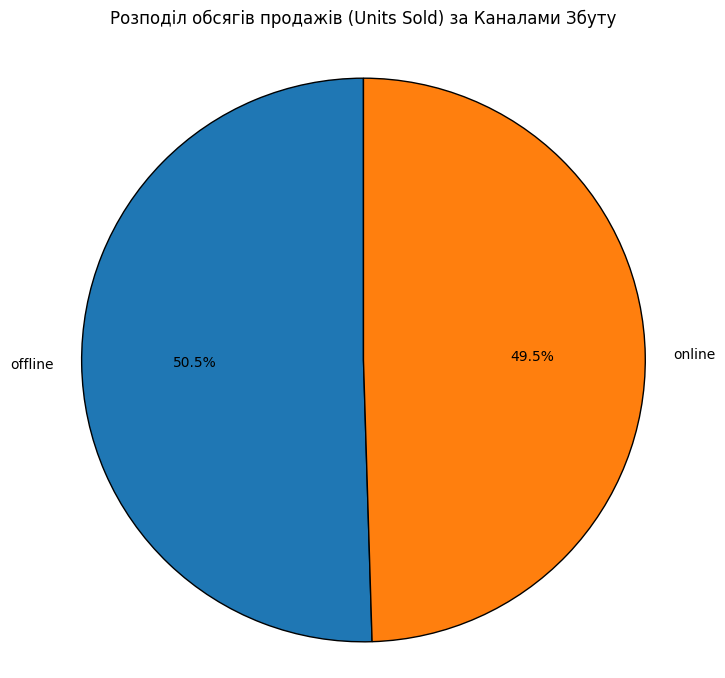

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
final_merged_df['Sales Channel'] = final_merged_df['Sales Channel'].str.lower().str.strip()
sales_channel_units = final_merged_df.groupby('Sales Channel')['Units Sold'].sum().reset_index()
sizes = sales_channel_units['Units Sold']
labels = sales_channel_units['Sales Channel']
plt.figure(figsize=(8, 8))
plt.pie(
    sizes,
    labels=labels,
    autopct='%1.1f%%',
    startangle=90,
    wedgeprops={'edgecolor': 'black'})
plt.title('Розподіл обсягів продажів (Units Sold) за Каналами Збуту', pad=20)
plt.axis('equal')
plt.show()

## Бачимо перевагу Офлайн каналів над Онлайн каналами

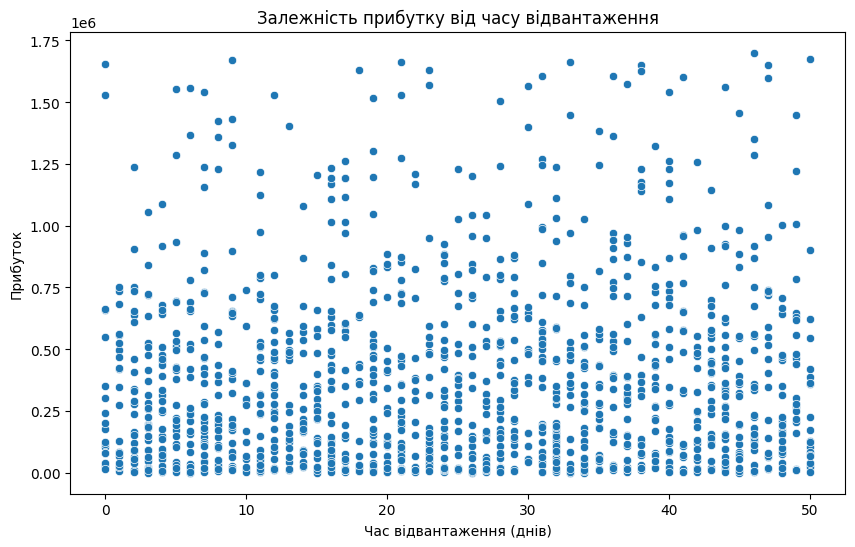

In [ ]:

final_df['Shipment Duration'] = (final_df['Ship Date'] - final_df['Order Date']).dt.days
avg_shipment_by_category = final_df.groupby('item_type')['Shipment Duration'].mean().sort_values()
avg_shipment_by_country = final_df.groupby('name')['Shipment Duration'].mean().sort_values().head(10)
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Shipment Duration', y='Total Profit', data=final_df)
plt.title('Залежність прибутку від часу відвантаження')
plt.ylabel('Прибуток')
plt.xlabel('Час відвантаження (днів)')
plt.show()

In [ ]:

correlation_coefficient = final_merged_df['Ship Date'].corr(final_merged_df['Total Profit'])
print(f"Коефіцієнт кореляції Пірсона між 'Часом відвантаження' та 'Загальним прибутком': {correlation_coefficient:.4f}")

Коефіцієнт кореляції Пірсона між 'Часом відвантаження' та 'Загальним прибутком': -0.0365


## Бачимо пряму заежність прибутку від часу відвантаження чим швидше відвантажується тим краще

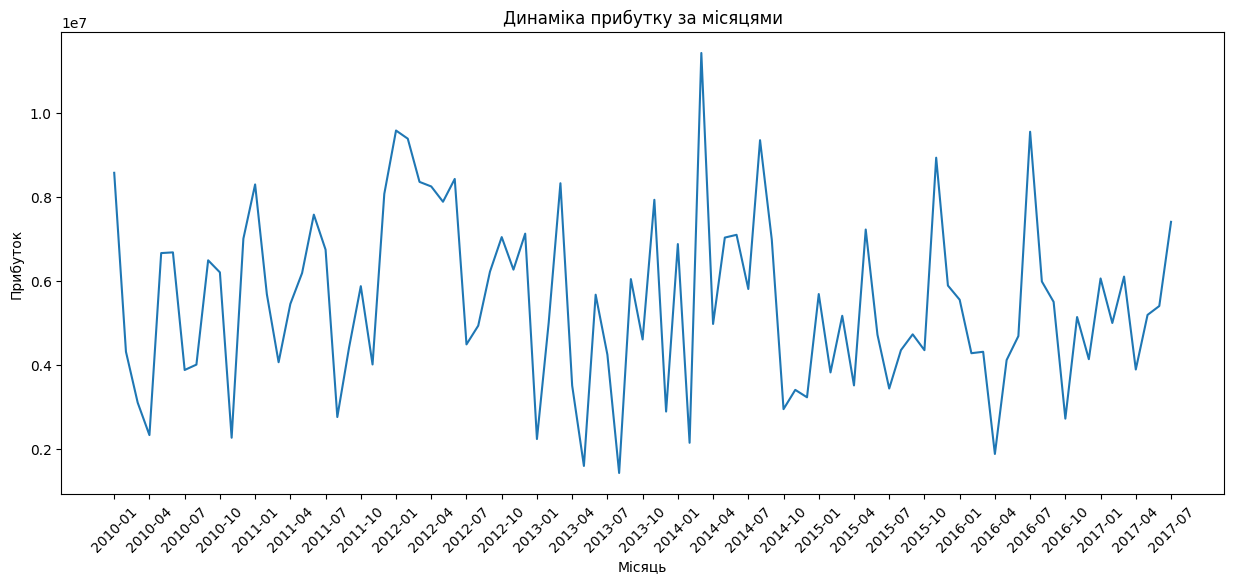

In [ ]:

#final_df['order_month'] = final_df['Order Date'].dt.to_period('M')
#monthly_profit = final_df.groupby('order_month')['Total Profit'].sum()
#monthly_profit.index = monthly_profit.index.astype(str)

#plt.figure(figsize=(15, 6))
#sns.lineplot(x=monthly_profit.index, y=monthly_profit.values)

#plt.title('Динаміка прибутку за місяцями')
#plt.ylabel('Прибуток')
#plt.xlabel('Місяць')
#plt.xticks(rotation=45)#

plt.figure(figsize=(15, 6))
sns.lineplot(x=monthly_profit.index, y=monthly_profit.values)

plt.title('Динаміка прибутку за місяцями')
plt.ylabel('Прибуток')
plt.xlabel('Місяць')


n = 3
plt.xticks(monthly_profit.index[::n], rotation=45)
plt.show()

##Бачимо що Динаміка прибутку не є рівною і постійно скаче від місяця до місяця

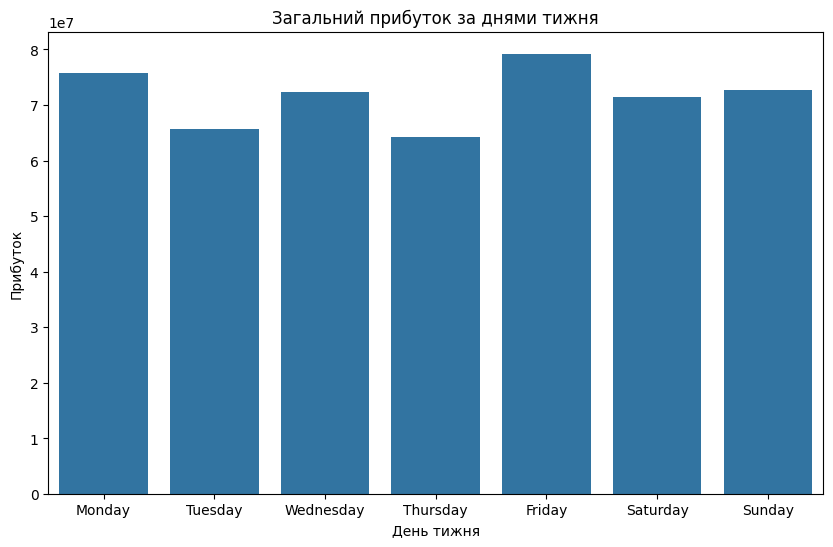

In [ ]:
final_df['weekday'] = final_df['Order Date'].dt.day_name()
weekday_profit = final_df.groupby('weekday')['Total Profit'].sum().reindex(['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'])
plt.figure(figsize=(10, 6))
sns.barplot(x=weekday_profit.index, y=weekday_profit.values)
plt.title('Загальний прибуток за днями тижня')
plt.ylabel('Прибуток')
plt.xlabel('День тижня')
plt.show()

##Бачимо суттєвий приріст продажів на вихідні дні

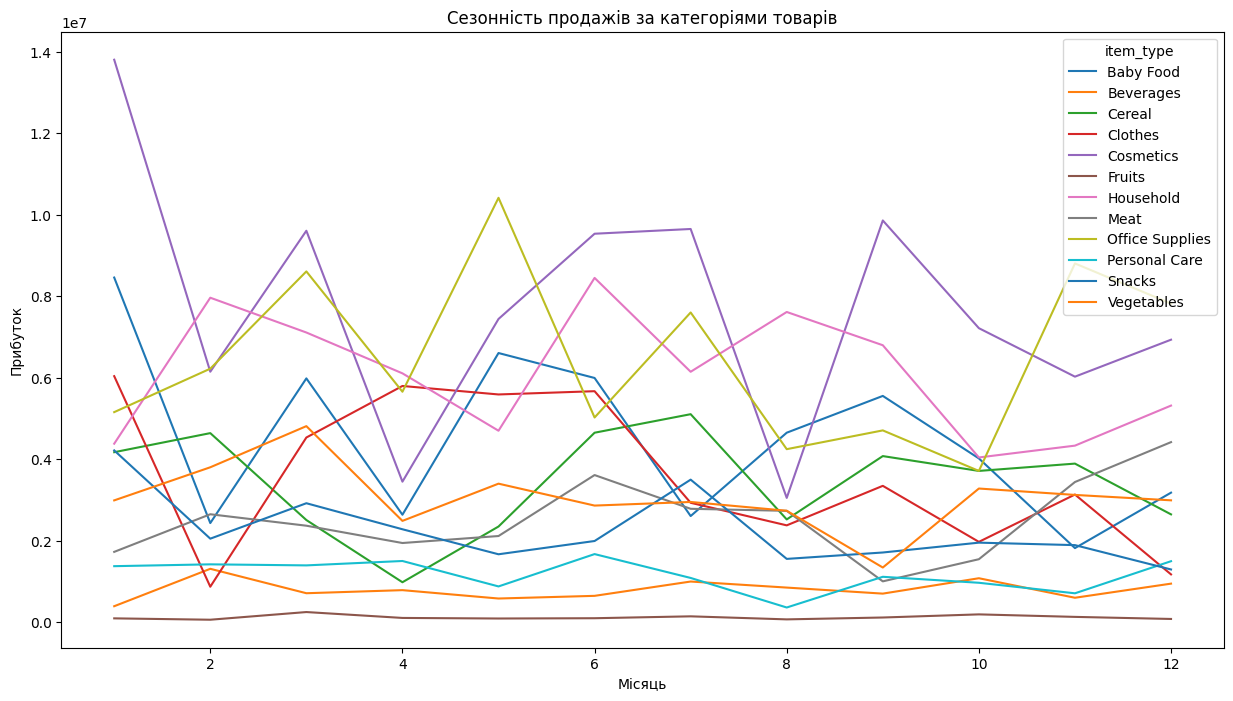

In [ ]:
seasonal_products = final_df.groupby([final_df['Order Date'].dt.month, 'item_type'])['Total Profit'].sum().unstack()
seasonal_products.plot(figsize=(15, 8))
plt.title('Сезонність продажів за категоріями товарів')
plt.ylabel('Прибуток')
plt.xlabel('Місяць')
plt.show()

## За рахунок виликої різноманітності товарів як такої сезоності попиту підприємство немає так як в ті місяці де паде продж конкретного товару виростає попит на інший товар яскравий приклад Косметика та Офісні принади бачимо значний підйо з 2 місяці і потім падіння в 6 у косметики і підйом в аналогічний термін в Офісних Принадь які навіть в цю пору року продаються краще за Косметику але за тим. бачимо падіння в цій категорії і знов приріст у Ксметиці